### PCA - Notebook for generating the images in the ppt

In [ ]:
https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

In [227]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [188]:
# Create an array with 5 clusters in 5-dimensions
X, y = make_blobs(n_samples=1000, centers=10, n_features=5, random_state=0)

# Standardize the data
#X = StandardScaler().fit_transform(X)


In [197]:
# Prepare the array in a DataFrame
col_name = ['Phosphate', 'Nitrogen', 'Potassium', 'Iron', 'Magnesium']
df = pd.DataFrame(X, columns=col_name)
string = '_Field'
df['Field_site'] = y
df['Field_site'] = 'Field_' + df['Field_site'].astype(str)


df.head()

,Phosphate,Nitrogen,Potassium,Iron,Magnesium,Field_site
0,1.184545,5.280426,2.411634,1.604237,-1.516404,Field_0
1,2.554226,-6.598910,-8.595598,-4.639479,-1.290659,Field_9
2,1.427205,3.619776,3.714818,1.966173,-1.980290,Field_0
3,-5.716443,6.051543,-1.593438,0.862405,-10.113686,Field_6
4,2.701151,-2.178412,7.656871,7.722826,-1.913851,Field_1


Dataframe of varience in 5 key soil nutrient, all standardised to a mean of 0.  10 clusters

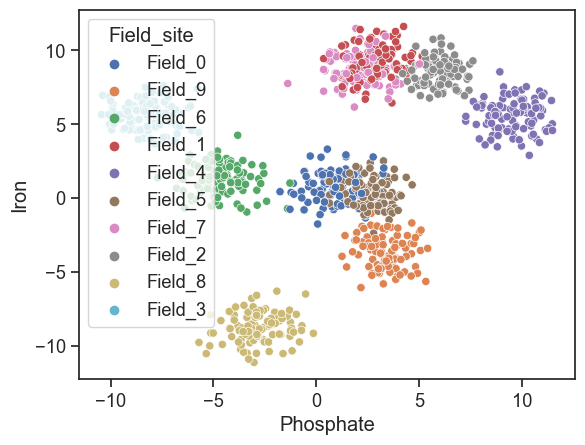

In [199]:
sns.scatterplot(data=df, x="Phosphate", y="Iron",  hue=df['Field_site']);

Make this better by moving the legend

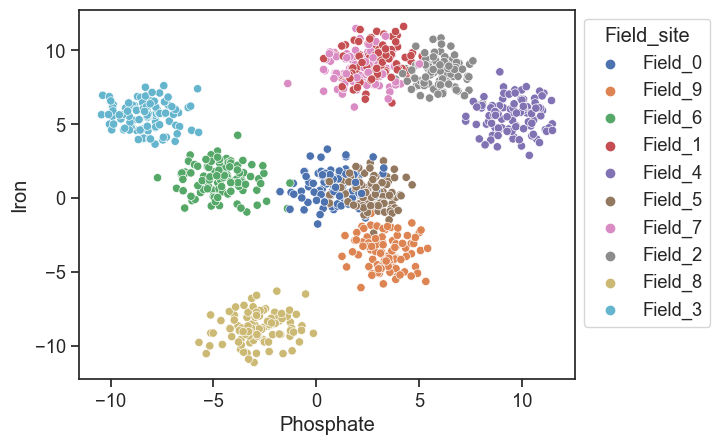

In [200]:
ax = sns.scatterplot(data=df, x="Phosphate", y="Iron",  hue=df['Field_site'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Look at all the dimensions

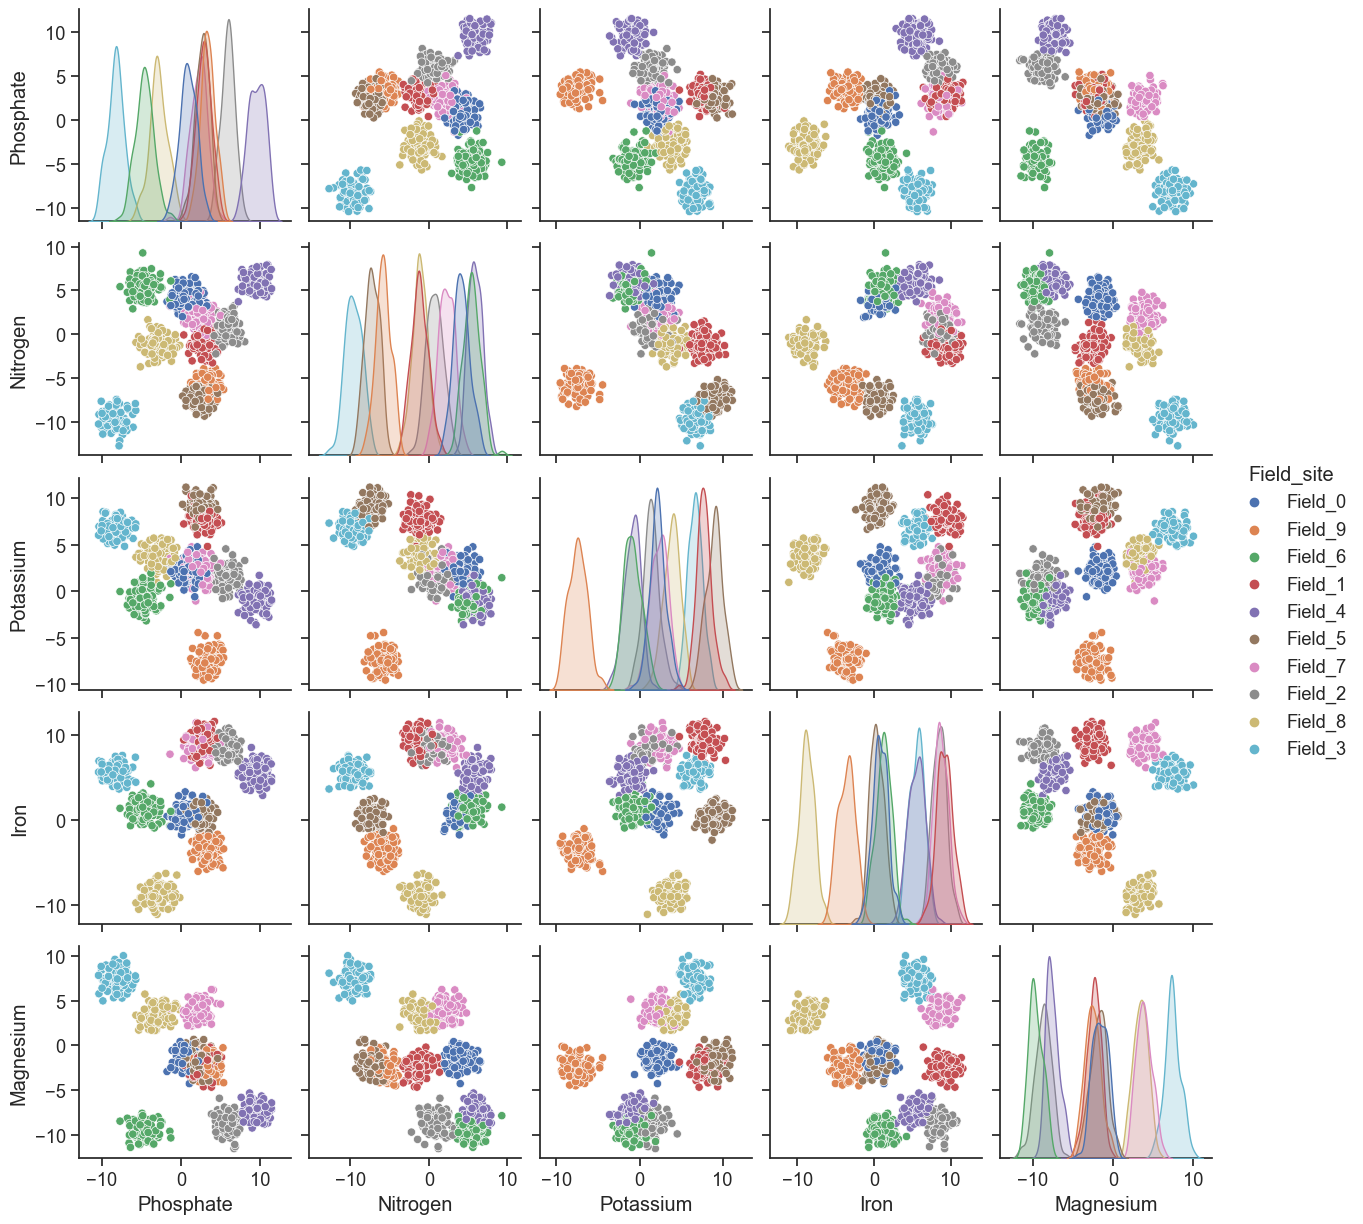

In [204]:
sns.pairplot(df, hue='Field_site');

Plot in three D for Phosphate, Potassium and Nitrogen

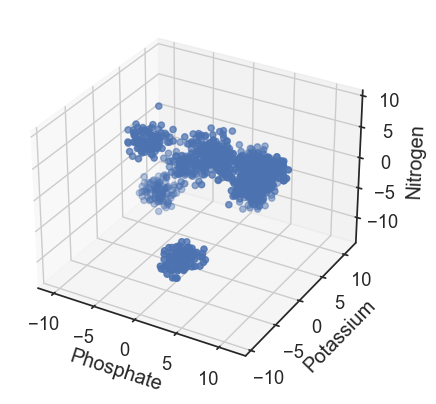

In [184]:
from mpl_toolkits.mplot3d import Axes3D

#sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Phosphate']
y = df['Potassium']
z = df['Nitrogen']

ax.set_xlabel("Phosphate")
ax.set_ylabel("Potassium")
ax.set_zlabel("Nitrogen")

ax.scatter(x, y, z,)

plt.show()

#### Using PCA to reduce the dimensions

Standardise the dataframe

In [209]:
df.head(3)

,Phosphate,Nitrogen,Potassium,Iron,Magnesium,Field_site
0,1.184545,5.280426,2.411634,1.604237,-1.516404,Field_0
1,2.554226,-6.598910,-8.595598,-4.639479,-1.290659,Field_9
2,1.427205,3.619776,3.714818,1.966173,-1.980290,Field_0


In [211]:
col_name

['Phosphate', 'Nitrogen', 'Potassium', 'Iron', 'Magnesium']

In [213]:
#define predictor variable columns
df_x = df[['Phosphate', 'Nitrogen', 'Potassium', 'Iron', 'Magnesium']]

#standardize the values for each predictor variable
df[col_name] = (df_x-df_x.mean())/df_x.std()

In [214]:
df.head(3)

,Phosphate,Nitrogen,Potassium,Iron,Magnesium,Field_site
0,0.000169,1.135779,0.005054,-0.201698,0.078734,Field_0
1,0.272266,-1.131794,-2.335140,-1.301174,0.120265,Field_9
2,0.048375,0.818788,0.282118,-0.137964,-0.006609,Field_0


In [215]:
from sklearn.decomposition import PCA
# Perform PCA (w/o limits on n_components)
pca = PCA()
principalComponents = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

In [216]:
principalComponents

array([[-0.4985333 ,  0.1372993 ,  0.79189216,  0.15117362,  0.64773991],
       [-0.15763508,  2.34070591, -1.48230411, -0.88397916, -0.18188522],
       [-0.31451235, -0.07743575,  0.59905837,  0.33151199,  0.44467519],
       ...,
       [-2.76814252, -0.33908774, -0.05830324,  0.0335619 ,  0.45006825],
       [ 3.15157369, -0.49144878,  0.59863135, -1.07078702, -0.19359558],
       [-0.15062723, -0.82904001,  0.10022321, -1.21447614,  1.12835492]])

In [217]:
PC_components

array([1, 2, 3, 4, 5])

In [218]:
# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=principalComponents)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-0.498533,0.137299,0.791892,0.151174,0.647740,0
1,-0.157635,2.340706,-1.482304,-0.883979,-0.181885,9
2,-0.314512,-0.077436,0.599058,0.331512,0.444675,0
3,-1.099273,1.067000,1.776319,-0.200449,-1.033612,6
4,0.279882,-1.399583,-0.167044,0.336979,-0.130525,1


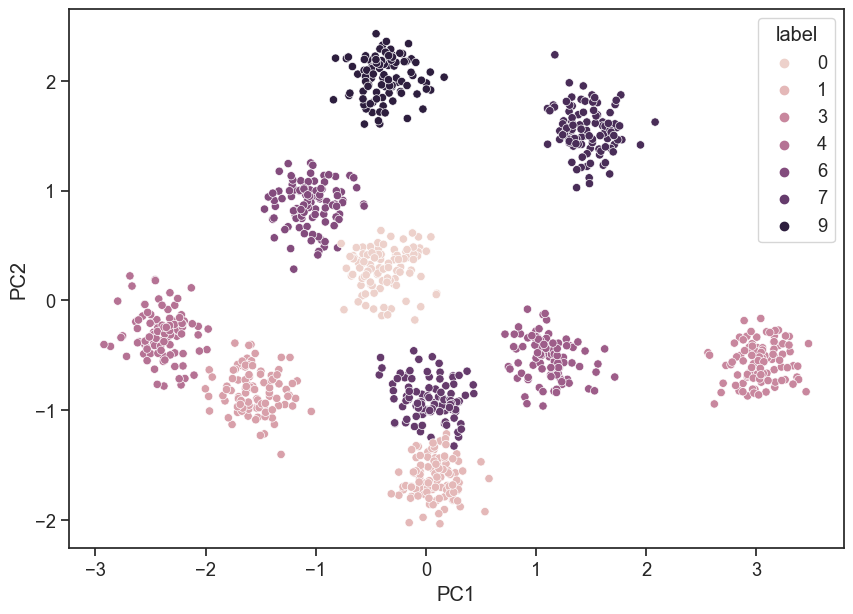

In [232]:
# Plot Principal Component
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label']);


3D plot of first 3 PCA?

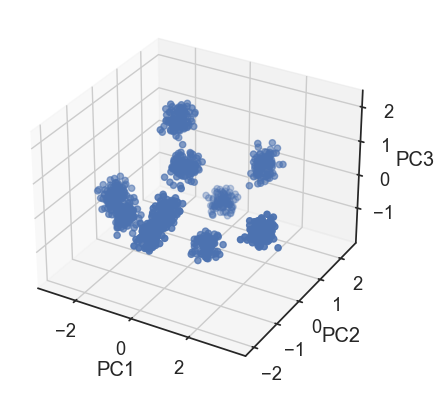

In [233]:
#sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z,)

plt.show()

Better spread of data?

#### How much varaiton is explained by each PCA?

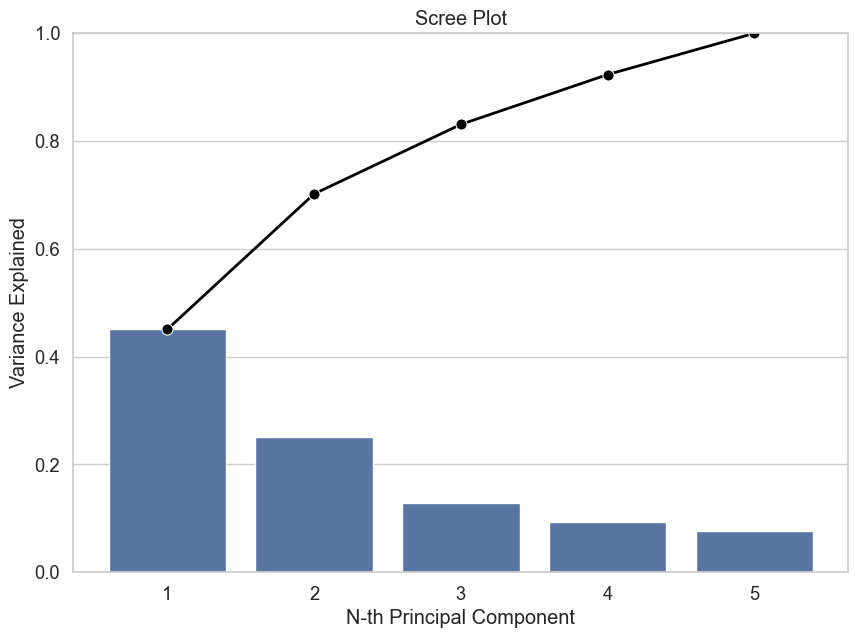

In [228]:
# Scree Plot
sns.set(style='whitegrid', font_scale=1.2);
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b');
sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8);

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

#### How much of each dimension contributes to each PCA?

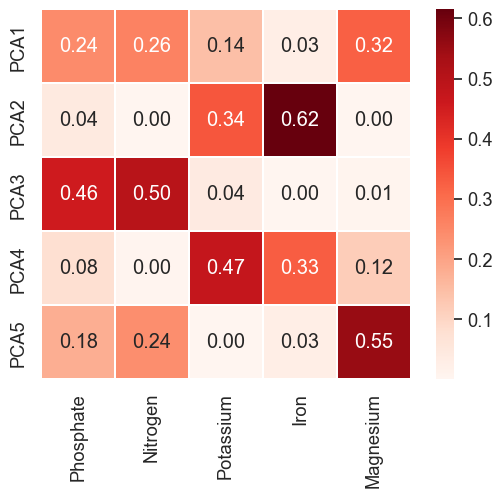

In [231]:
# Feature Weight
sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cmap = "Reds",
                 cbar_kws={"orientation": "vertical"});

PCA1 is Magnesium, Phosphate and Nitrogen, PCA2 is Potassium and Iron, PCA3 is Phosphate and Nitrogen,